In [2]:
# ============================================================
# Advanced Data Mining for Data-Driven Insights and Predictive Modeling
# Deliverable 1: Data Collection, Cleaning, and Exploration
#Vinay Varma Sagi
# ============================================================

# -------------------------------
# Step 1: Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Display settings for better readability
pd.set_option('display.max_columns', None)




In [3]:
# -------------------------------
# Step 2: Data Loading
# -------------------------------
# Load the dataset (ensure the file is in the same directory)
data = pd.read_csv("Brain Tumor.csv")

# Display first few rows
print("Preview of the dataset:\n")
display(data.head())

# Basic dataset structure
print("\nDataset Information:\n")
print(data.info())

Preview of the dataset:



,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155



Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object

In [4]:
# -------------------------------
# Step 3: Dataset Description
# -------------------------------
print("\nDataset Summary:")
print(f"Total Records: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}")

print("\nColumn Names:\n", list(data.columns))

print("""
This dataset consists of first-order (Mean, Variance, Skewness, Kurtosis)
and second-order statistical features (Contrast, Energy, ASM, Entropy, Homogeneity,
Dissimilarity, Correlation, Coarseness) derived from brain MRI images.
The 'Class' column represents the target variable: 1 = Tumor, 0 = Non-Tumor.
""")


Dataset Summary:
Total Records: 3762
Total Columns: 15

Column Names:
 ['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarseness']

This dataset consists of first-order (Mean, Variance, Skewness, Kurtosis) 
and second-order statistical features (Contrast, Energy, ASM, Entropy, Homogeneity, 
Dissimilarity, Correlation, Coarseness) derived from brain MRI images.
The 'Class' column represents the target variable: 1 = Tumor, 0 = Non-Tumor.



In [5]:
# -------------------------------
# Step 4: Data Cleaning
# -------------------------------
# Check for missing values
print("\nMissing Values per Column:\n")
print(data.isnull().sum())

# Fill missing values (if any) using mean imputation
data_filled = data.fillna(data.mean(numeric_only=True))
print("\nMissing values handled (if any):\n")
print(data_filled.isnull().sum())

# Check for duplicates
duplicate_count = data_filled.duplicated().sum()
print(f"\nNumber of duplicate records: {duplicate_count}")

# Remove duplicates if found
data_cleaned = data_filled.drop_duplicates()
print(f"Dataset shape after duplicate removal: {data_cleaned.shape}")

# Identify and handle noisy or inconsistent data (negative or impossible values)
for col in data_cleaned.select_dtypes(include=[np.number]).columns:
    negatives = data_cleaned[data_cleaned[col] < 0]
    if not negatives.empty:
        print(f"Negative values found in {col}. Replacing with column mean.")
        data_cleaned[col] = np.where(data_cleaned[col] < 0, data_cleaned[col].mean(), data_cleaned[col])



Missing Values per Column:

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Missing values handled (if any):

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Number of duplicate records: 0
Dataset shape after duplicate removal: (3762, 15)



Descriptive Statistics:



,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


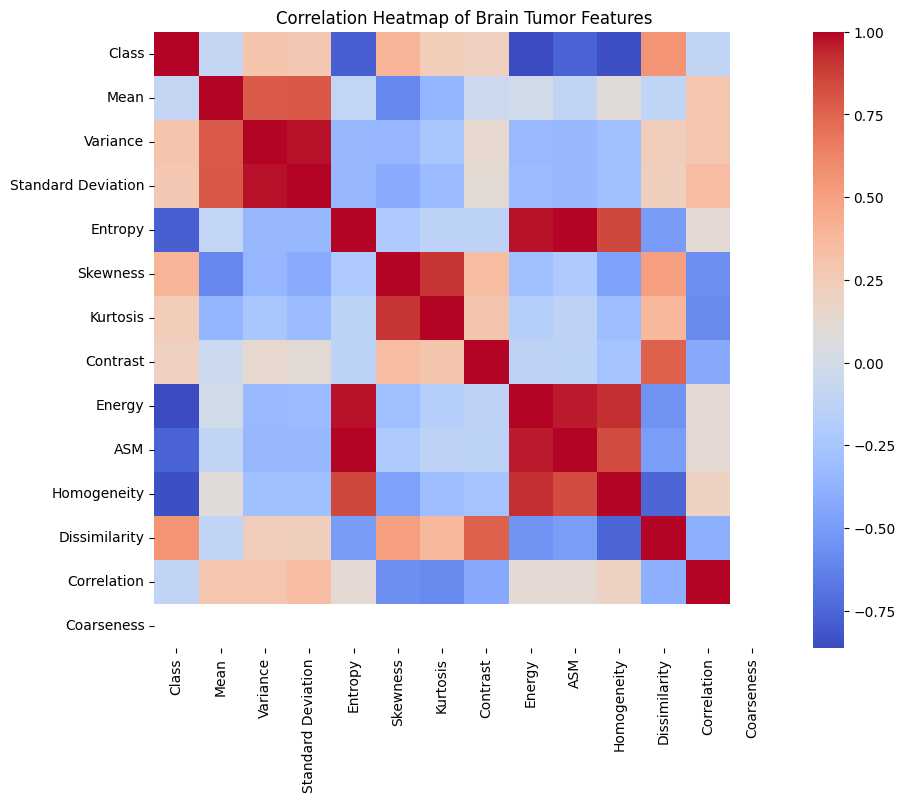

In [7]:
# -------------------------------
# Step 5: Exploratory Data Analysis (EDA)
# -------------------------------

# Summary statistics
print("\nDescriptive Statistics:\n")
display(data_cleaned.describe())

# Correlation matrix
corr = data_cleaned.corr(numeric_only=True)

# ------------- Visualization 1: Correlation Heatmap -------------
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Brain Tumor Features")
plt.show()


/tmp/ipython-input-69644363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data_cleaned, palette='Set2')


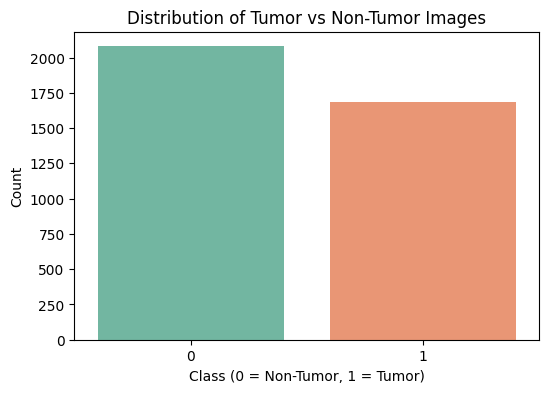

In [8]:
# ------------- Visualization 2: Distribution of Class Labels -------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data_cleaned, palette='Set2')
plt.title("Distribution of Tumor vs Non-Tumor Images")
plt.xlabel("Class (0 = Non-Tumor, 1 = Tumor)")
plt.ylabel("Count")
plt.show()


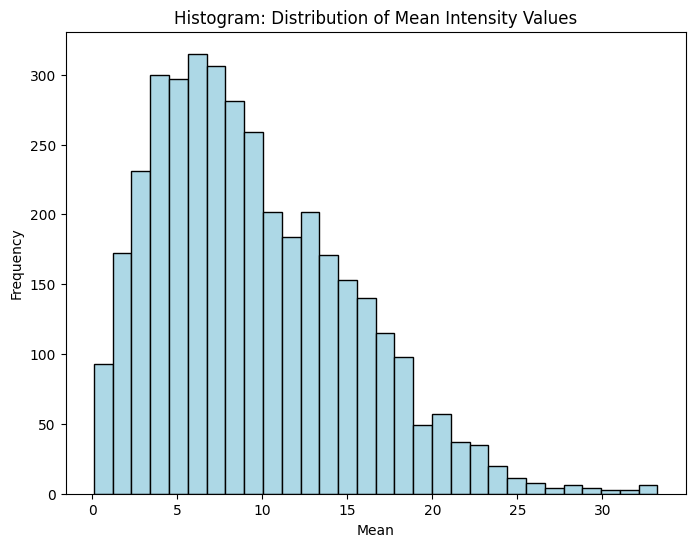

In [9]:
# ------------- Visualization 3: Histogram for Mean Feature -------------
plt.figure(figsize=(8, 6))
plt.hist(data_cleaned['Mean'], bins=30, edgecolor='black', color='lightblue')
plt.title("Histogram: Distribution of Mean Intensity Values")
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

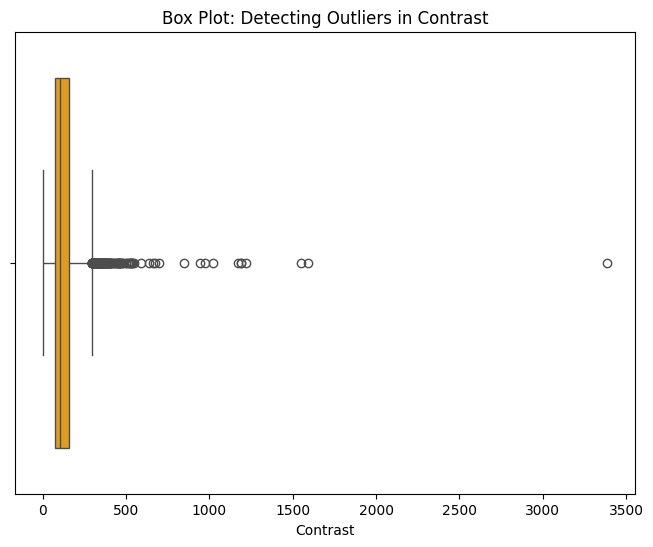

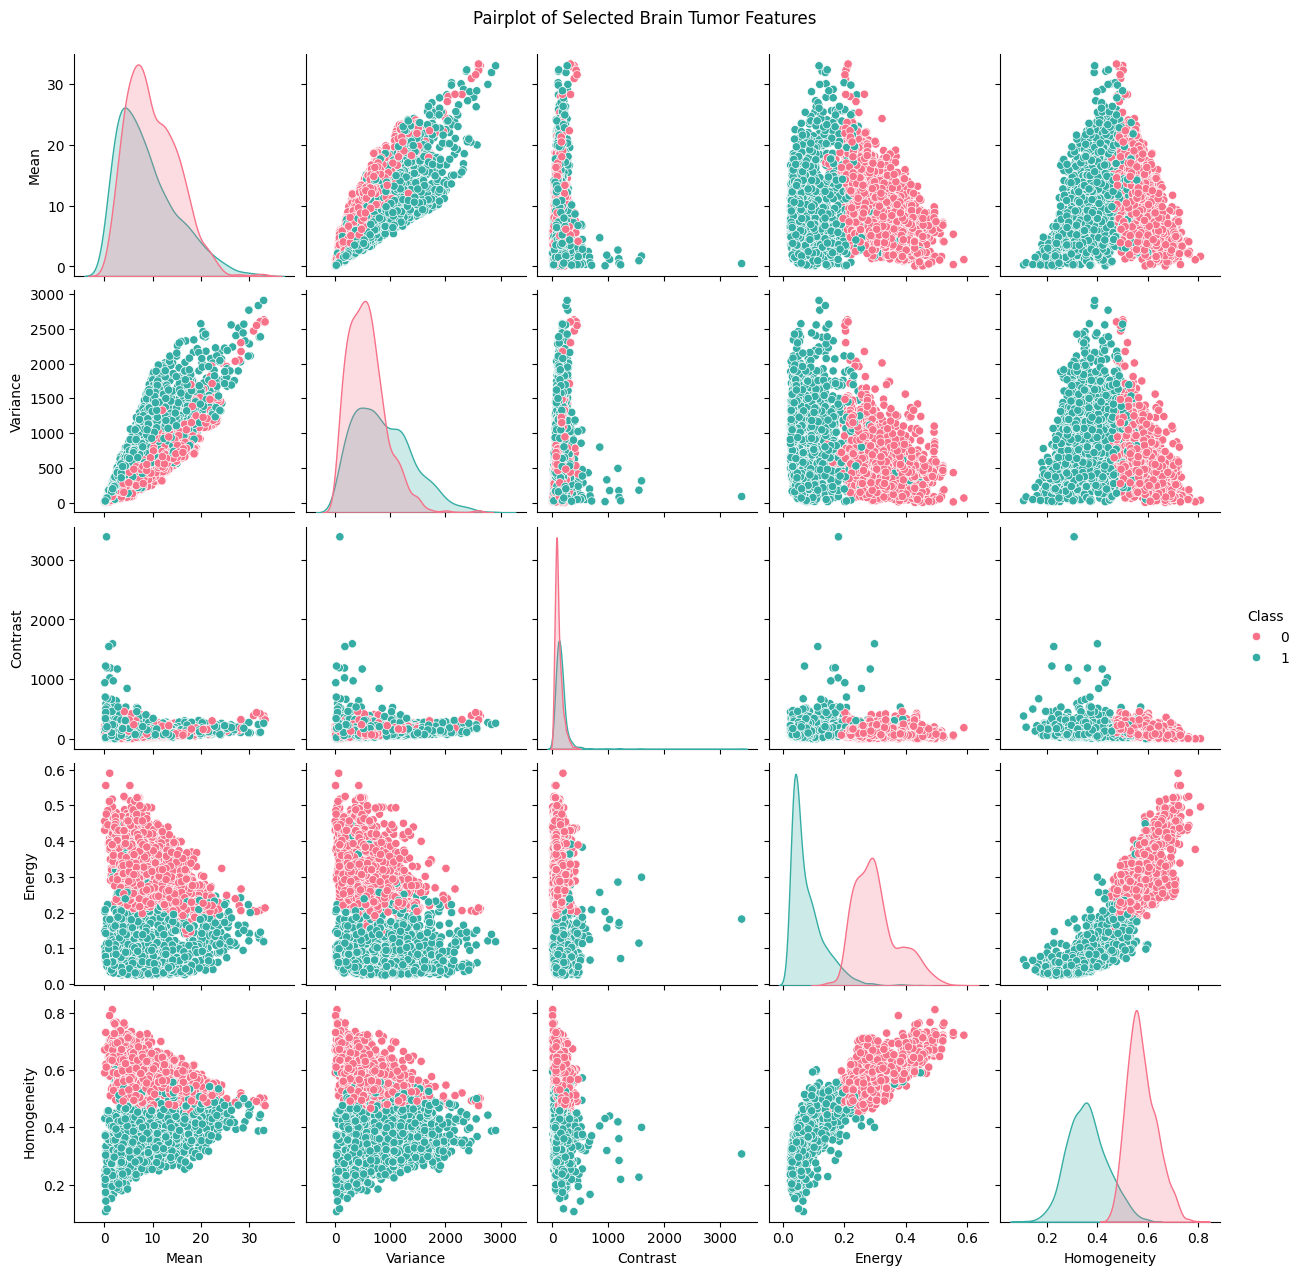

In [10]:

# ------------- Visualization 4: Box Plot for Contrast -------------
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['Contrast'], color='orange')
plt.title("Box Plot: Detecting Outliers in Contrast")
plt.show()

# ------------- Visualization 5: Pairplot for Key Features -------------
key_features = ['Mean', 'Variance', 'Contrast', 'Energy', 'Homogeneity', 'Class']
sns.pairplot(data_cleaned[key_features], hue='Class', diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Selected Brain Tumor Features", y=1.02)
plt.show()

In [12]:
# -------------------------------
# Step 6: Outlier Detection and Handling
# -------------------------------
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns

# Calculate IQR
Q1 = data_cleaned[numeric_cols].quantile(0.25)
Q3 = data_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_condition = ((data_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) |
                     (data_cleaned[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers = data_cleaned[outlier_condition.any(axis=1)]
print(f"\nTotal Outliers Detected: {len(outliers)}")

# Remove outliers for cleaned version
data_no_outliers = data_cleaned[~outlier_condition.any(axis=1)]
print(f"Dataset shape after removing outliers: {data_no_outliers.shape}")


Total Outliers Detected: 1089
Dataset shape after removing outliers: (2673, 15)


In [13]:
# -------------------------------
# Step 7: Insights and Observations
# -------------------------------
print("""
Key Insights:
1. The dataset contains 3,762 entries and 15 attributes with no missing or duplicate records.
2. Outlier analysis revealed several extreme values, mainly in Contrast and Variance features.
3. Correlation heatmap showed strong positive relationships among texture features such as Energy and ASM.
4. Tumor images (Class = 1) often exhibit higher Variance and Dissimilarity, indicating irregular textures.
5. The data is clean and ready for feature engineering, regression, and classification tasks in later deliverables.
""")


Key Insights:
1. The dataset contains 3,762 entries and 15 attributes with no missing or duplicate records.
2. Outlier analysis revealed several extreme values, mainly in Contrast and Variance features.
3. Correlation heatmap showed strong positive relationships among texture features such as Energy and ASM.
4. Tumor images (Class = 1) often exhibit higher Variance and Dissimilarity, indicating irregular textures.
5. The data is clean and ready for feature engineering, regression, and classification tasks in later deliverables.



In [14]:
# -------------------------------
# Step 8: Save Cleaned Data for Next Deliverables
# -------------------------------
data_no_outliers.to_csv("Brain_Tumor_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Brain_Tumor_Cleaned.csv'.")


Cleaned dataset saved as 'Brain_Tumor_Cleaned.csv'.
